### Treść zadania

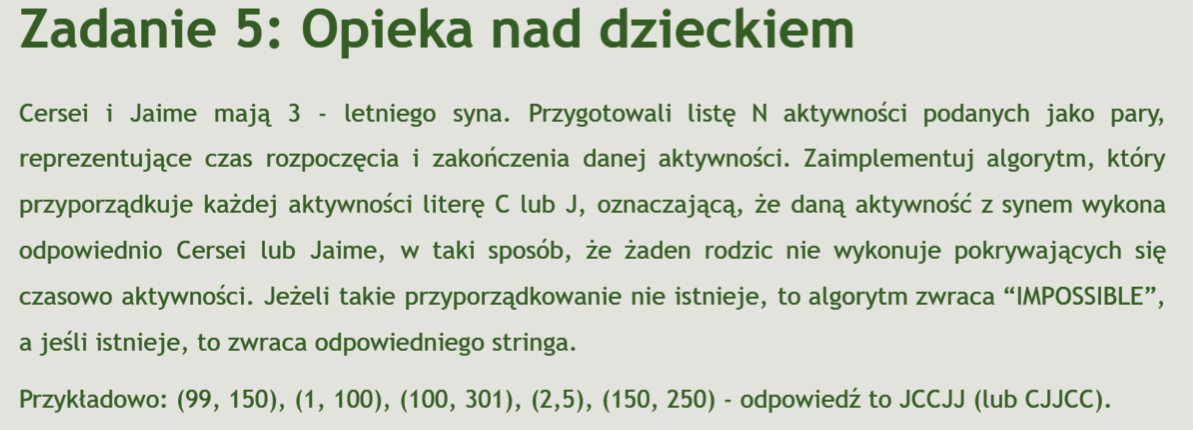

### Omówienie algorytmu

Skoro mamy podzielić wszystkie aktywności pomiędzy dokładnie 2 osoby, wystarczy przydzielać zadania w następujący sposób:
- jeżeli pierwsza osoba może wykonać dane zadanie, dajemy to zadanie do wykonania pierwszej osobie (nie zwracamy uwagi na to, czy może je wykonać druga osoba),
- jeżeli pierwsza nie może wykonać, przydzielamy to zadanie drugiej osobie, o ile ona może wykonać to zadanie. Jeżeli nie jest to możliwe, zwracamy stringa "IMPOSSIBLE", ponieważ dane zadanie pokrywa się z innymi zadaniami, które już są wykonywane przez obie osoby.

<br><br>
Przed przystąpieniem do zachłannego wybierania przedziałów w sposób opisany wyżej, musimy jednak przygotować sobie dane, a więc posortować wszystkie aktywności najlepiej według początków (końce nas nie interesują wtedy, więc możemy również po nich posortować, ale nie musimy - domyślne sortowanie wbudowane w Pythona posortuje po obu współrzędnych). Konieczne jest również zapamiętanie indeksów tych przedziałów z początkowej tablicy, tak aby móc wygenerować stringa, który odpowiada temu, jaka osoba wykona kolejne zadania z tablicy wejściowej. Najlepiej jest więc wcale nie ruszać tej tablicy i wykonać sortowanie logiczne. Ponieważ na tym kolokwium można już korzystać z wbudwanych sortowań, bardzo łatwo wykonamy takie sortowanie (przykład niżej)

    sorted(range(len(t)), key=lambda i: t[i])

lub łatwiej:

    sorted(range(len(t)), key=t.__getitem__)

Powyższa funkcja zwróci posortowaną tablicę indeksów w taki sposób, że kolejne indeksy będą odpowiadały elementom z tablicy $ t $ takim, które powinny się znaleźć po posortowaniu na danej pozycji tablicy $ t $, na przykład dla:

    t = [(99, 150), (1, 100), (100, 301), (2, 5), (150, 250)]

Otrzymamy:

    [1, 3, 0, 2, 4]
    # Element o indeksie 1 (przedział (1, 100)) powinien być pierwszy - się zaczyna najwcześniej,
    # Element o indeksie 3 (przedział (2, 5)) - kolejny,
    # Element o indeksie 0 (przedział (99, 150)) - kolejny,
    # Element o indeksie 2 (przedział (100, 301)) - kolejny,
    # Element o indeksie 4 (przedział (150, 250)) - kolejny,

###### Sprawdzenie poprawności rozumowania:

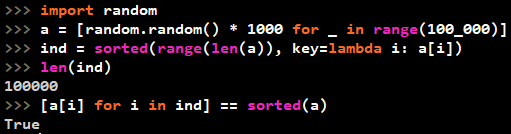

###### UWAGA:
W rozwiązaniu zakładam, że możliwe jest rozpoczęcie nowej aktywności w tym samym momencie, w którym kończy się poprzednia (tzn. przedziały czasu są otwarte).

### Złożoność

###### Obliczeniowa:
$ O(n \cdot log(n)) $  - na sortowanie przedziałów
###### Pamięciowa:
$ O(n) $  - na tablicę posortowanych indeksów oraz tablicę przydzielonych zadań

### Implementacja

In [1]:
def shedule(T: 'time spans'):
    n = len(T)
    result = [''] * n
    # In order not to modify the original array, create an array
    # of indices which will refer to the elements of T array in
    # a sorted order
    ind = sorted(range(len(T)), key=T.__getitem__)
    # Loop over all the time spans and assign each task to the
    # person who is currently free (if it is possible)
    C = 0  # End time of the Cersei's activity
    J = 0  # End time of the Jaime's activity
    for i in ind:
        if T[i][0] >= C:
            C = T[i][1]
            result[i] = 'C'
        elif T[i][0] >= J:
            J = T[i][1]
            result[i] = 'J'
        else:
            return "IMPOSSIBLE"
        
    return ''.join(result)

###### Kilka testów

In [2]:
T = [(99, 150), (1, 100), (100, 301), (2, 5), (150, 250)]

print(shedule(T))

JCCJJ


In [3]:
T = [(99, 150), (1, 100), (100, 301), (2, 5), (150, 250), (80, 120)]

print(shedule(T))

IMPOSSIBLE


In [4]:
T = [(99, 150), (1, 100), (100, 301), (2, 5), (150, 250), (80, 99), (250, 300), (300, 301), (301, 305)]

print(shedule(T))

JCCJJJJJC
